In [7]:
import numpy as np
from matplotlib import pyplot as plt
from ConductivityClass import Conductivity
import time

In [8]:
#Section1: System
print("Defining the System")
start=time.time()
dt=2 #In fs, from the output file
t=5*10**6 #Total simulation time=5 ns
times=np.arange(0, t+dt, dt)
V=118259.53 #Again, from the data
! cat Velocities_output/v_anion_* > v_anion.out   #read the velocities from all files in the folder named example_velocity_output which start with v_anion_* and add their contents to v_anion.out
! cat Velocities_output/v_cation_* > v_cation.out
end=time.time()
t1=end-start
print(f"Time Taken={t1:.3f}sec")

Defining the System
Time Taken=5.165sec


In [9]:
#Section2: Coefficients
print("Coefficient Determination")
start=time.time()
coeffs_finding=Conductivity("v_cation.out", "v_anion.out", V, times) #Instance of our class
acf_minus_minus, acf_plus_plus, ccf_plus_minus, L_minus_minus, L_plus_plus, L_plus_minus=coeffs_finding.finalCalc()
end=time.time()
t2=end-start
print(f"Time Taken={t2:.3f}sec")

Coefficient Determination
Time Taken=28.785sec


Plotting


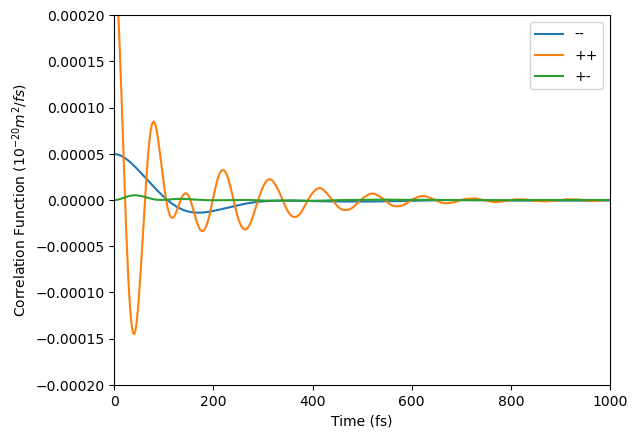

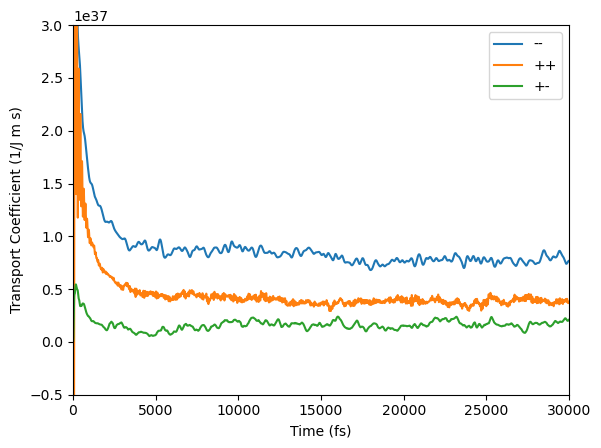

Time Taken=3.077sec


In [10]:
print("Plotting")
start=time.time()
plt.plot(times, acf_minus_minus[:, 0], label="--")
plt.plot(times, acf_plus_plus[:, 0], label="++")
plt.plot(times, ccf_plus_minus[:, 0], label="+-")
plt.xlim(0,1000)
plt.ylim(-0.0002, 0.0002)
plt.xlabel("Time (fs)")
plt.ylabel("Correlation Function $(10^{-20}m^2/fs)$")
plt.legend()
plt.show()
plt.plot(times[:-1], L_minus_minus, label="--")
plt.plot(times[:-1], L_plus_plus, label="++")
plt.plot(times[:-1], L_plus_minus, label="+-")
plt.xlim(0,30000)
plt.ylim(-0.5e37,0.3e38)
plt.xlabel("Time (fs)")
plt.ylabel("Transport Coefficient (1/J m s)")
plt.legend()
plt.show()
end=time.time()
t3=end-start
print(f"Time Taken={t3:.3f}sec")

Conductivity


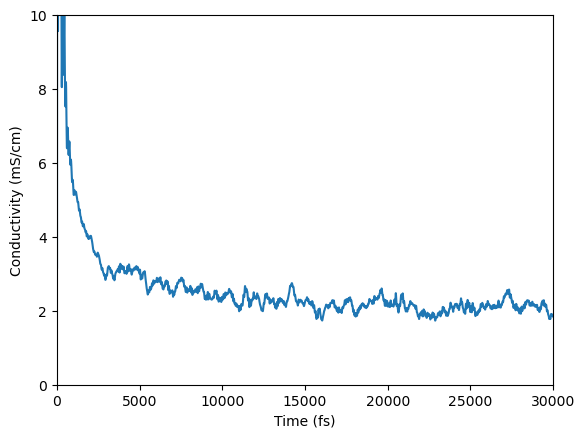

Conductivity=2.133mS/cm
Time Taken=0.109sec
Total Time=37.136sec


In [11]:
#Conductivity=sum over i and j (z_i z_j L_ij e^2), z_i is charge
#Conductivity=((L++)+(L--)-2*(L+-))*e^2
#Take the units as mS/sm instead of S/m (so include a factor of 10)
print("Conductivity")
start=time.time()
e=1.6*10**(-19)
C=(L_plus_plus+L_minus_minus-2*L_plus_minus)*e*e*10
plt.plot(times[:-1], C)
plt.xlim(0,30000)
plt.ylim(0, 10)
plt.xlabel("Time (fs)")
plt.ylabel("Conductivity (mS/cm)")
plt.show()
print(f"Conductivity={C[10000]:.3f}mS/cm") #Conductivity at t=20000fs=20ps
end=time.time()
t4=end-start
print(f"Time Taken={t4:.3f}sec")
print(f"Total Time={t1+t2+t3+t4:.3f}sec")